# Import Libraries

In [1]:
# Note that "MyNLPToolBox" is written entirely by me from scratch :D
from MyNLPToolBox import TextPreprocessor
from MyNLPToolBox.WordEmbedders import TFIDFVectorizer
from MyNLPToolBox import FilePickling as FP
from MyNLPToolBox.TextVisualizer import CountPlot
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import pandas as pd
import numpy as np

# Load data from .json

In [3]:
df = pd.read_json('data.json',lines=True)
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


# Preprocessing data

In [4]:
# Modes of preprocessing data
modes = ('remove_unicode', 'lowercase', 'remove_accents')
TextPreprocessor.process(df,modes)
headlines_train = df['headline'][:20000]
headlines_test = df['headline'][20000:]
y_train = df['is_sarcastic'][:20000]
y_test = df['is_sarcastic'][20000:]
FP.save_obj(y_train,'y_train')
FP.save_obj(y_test,'y_test')

saved to obj/y_train.pkl
saved to obj/y_test.pkl


Progress..98%Done


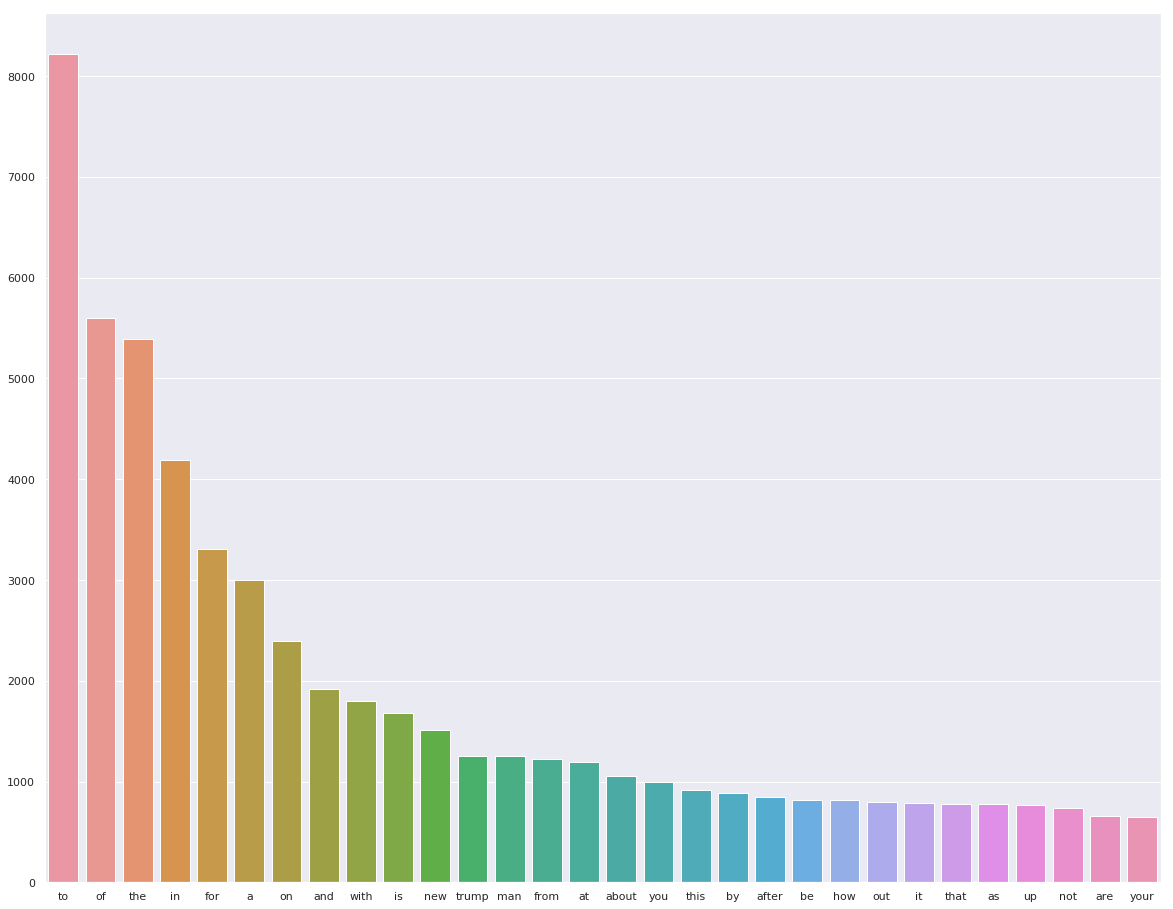

In [4]:
CountPlot(df)

In this experiment, we're not gonna remove stopwords!:D

# Embedding text with different methods and comparing the result

In [6]:
Vectorizer = TFIDFVectorizer(mode='natural').fit(df['headline'])

## Natural TFIDF

In [7]:
x_train = Vectorizer.transform(headlines_train)
x_test = Vectorizer.transform(headlines_test)
model_lr = LogisticRegression().fit(x_train,y_train)
y_test_pred = model_lr.predict(x_test)
print('====\nLOGISTIC REGRESSION')
print('Accuracy: ', accuracy_score(y_test,y_test_pred))
print('Precision Score: ', precision_score(y_test,y_test_pred))
print('Recall Score: ', recall_score(y_test,y_test_pred))
print('F1 Score: ', f1_score(y_test,y_test_pred))

model_nb = MultinomialNB().fit(x_train,y_train)
y_test_pred = model_nb.predict(x_test)
print('====\nNAIVE BAYES')
print('Accuracy: ', accuracy_score(y_test,y_test_pred))
print('Precision Score: ', precision_score(y_test,y_test_pred))
print('Recall Score: ', recall_score(y_test,y_test_pred))
print('F1 Score: ', f1_score(y_test,y_test_pred))

Performing Tf..98% Done!
Performing Idf.. Done!
Performing Tfidf.. Done!
Performing Tf..97% Done!
Performing Idf.. Done!
Performing Tfidf.. Done!


/home/truongphatuit/.conda/envs/tf2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


====
LOGISTIC REGRESSION
Accuracy:  0.8363392457892384
Precision Score:  0.828080229226361
Recall Score:  0.7890784982935154
F1 Score:  0.8081090527787488
====
NAIVE BAYES
Accuracy:  0.8016097779102698
Precision Score:  0.756167894905479
Recall Score:  0.8054607508532423
F1 Score:  0.7800363576268385


## Logarithmic TFIDF

In [8]:
Vectorizer.change_mode('log')
x_train = Vectorizer.transform(headlines_train)
x_test = Vectorizer.transform(headlines_test)
model_lr = LogisticRegression().fit(x_train,y_train)
y_test_pred = model_lr.predict(x_test)
print('====\nLOGISTIC REGRESSION')
print('Accuracy: ', accuracy_score(y_test,y_test_pred))
print('Precision Score: ', precision_score(y_test,y_test_pred))
print('Recall Score: ', recall_score(y_test,y_test_pred))
print('F1 Score: ', f1_score(y_test,y_test_pred))

model_nb = MultinomialNB().fit(x_train,y_train)
y_test_pred = model_nb.predict(x_test)
print('====\nNAIVE BAYES')
print('Accuracy: ', accuracy_score(y_test,y_test_pred))
print('Precision Score: ', precision_score(y_test,y_test_pred))
print('Recall Score: ', recall_score(y_test,y_test_pred))
print('F1 Score: ', f1_score(y_test,y_test_pred))

Performing Tf..98% Done!
Performing LogTf.. Done!
Performing Idf.. Done!
Performing Tfidf.. Done!
Performing Tf..97% Done!
Performing LogTf.. Done!
Performing Idf.. Done!
Performing Tfidf.. Done!


/home/truongphatuit/.conda/envs/tf2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


====
LOGISTIC REGRESSION
Accuracy:  0.8367864063198688
Precision Score:  0.828499820981024
Recall Score:  0.7897610921501707
F1 Score:  0.8086667831556876
====
NAIVE BAYES
Accuracy:  0.80175883142048
Precision Score:  0.7564102564102564
Recall Score:  0.8054607508532423
F1 Score:  0.7801652892561983


## Boolean TFIDF

In [9]:
Vectorizer.change_mode('boolean')
x_train = Vectorizer.transform(headlines_train)
x_test = Vectorizer.transform(headlines_test)
model_lr = LogisticRegression().fit(x_train,y_train)
y_test_pred = model_lr.predict(x_test)
print('====\nLOGISTIC REGRESSION')
print('Accuracy: ', accuracy_score(y_test,y_test_pred))
print('Precision Score: ', precision_score(y_test,y_test_pred))
print('Recall Score: ', recall_score(y_test,y_test_pred))
print('F1 Score: ', f1_score(y_test,y_test_pred))

model_nb = MultinomialNB().fit(x_train,y_train)
y_test_pred = model_nb.predict(x_test)
print('====\nNAIVE BAYES')
print('Accuracy: ', accuracy_score(y_test,y_test_pred))
print('Precision Score: ', precision_score(y_test,y_test_pred))
print('Recall Score: ', recall_score(y_test,y_test_pred))
print('F1 Score: ', f1_score(y_test,y_test_pred))

Performing Tf..98% Done!
Performing BooleanTf.. Done!
Performing Idf.. Done!
Performing Tfidf.. Done!
Performing Tf..97% Done!
Performing BooleanTf.. Done!
Performing Idf.. Done!
Performing Tfidf.. Done!


/home/truongphatuit/.conda/envs/tf2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


====
LOGISTIC REGRESSION
Accuracy:  0.8373826203607095
Precision Score:  0.8301615798922801
Recall Score:  0.7890784982935154
F1 Score:  0.8090988626421698
====
NAIVE BAYES
Accuracy:  0.8022059919511104
Precision Score:  0.756152125279642
Recall Score:  0.8075085324232082
F1 Score:  0.7809869615448094


## Augmented TFIDF

In [10]:
Vectorizer.change_mode('augmented')
x_train = Vectorizer.transform(headlines_train)
x_test = Vectorizer.transform(headlines_test)
model_lr = LogisticRegression().fit(x_train,y_train)
y_test_pred = model_lr.predict(x_test)
print('====\nLOGISTIC REGRESSION')
print('Accuracy: ', accuracy_score(y_test,y_test_pred))
print('Precision Score: ', precision_score(y_test,y_test_pred))
print('Recall Score: ', recall_score(y_test,y_test_pred))
print('F1 Score: ', f1_score(y_test,y_test_pred))
FP.sa

model_nb = MultinomialNB().fit(x_train,y_train)
y_test_pred = model_nb.predict(x_test)
print('====\nNAIVE BAYES')
print('Accuracy: ', accuracy_score(y_test,y_test_pred))
print('Precision Score: ', precision_score(y_test,y_test_pred))
print('Recall Score: ', recall_score(y_test,y_test_pred))
print('F1 Score: ', f1_score(y_test,y_test_pred))

Performing Tf..98% Done!
Performing AugTf..98% Done!
Performing Idf.. Done!
Performing Tfidf.. Done!
Performing Tf..97% Done!
Performing AugTf..97% Done!
Performing Idf.. Done!
Performing Tfidf.. Done!


/home/truongphatuit/.conda/envs/tf2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


====
LOGISTIC REGRESSION
Accuracy:  0.8373826203607095
Precision Score:  0.829688060236644
Recall Score:  0.7897610921501707
F1 Score:  0.8092323832837909
====
NAIVE BAYES
Accuracy:  0.8048889551348934
Precision Score:  0.7595260967018892
Recall Score:  0.8095563139931741
F1 Score:  0.7837435982157608


# Save embedded array for fine-tuning

In [8]:
Vectorizer.change_mode('augmented')
x_train = Vectorizer.transform(headlines_train)
x_test = Vectorizer.transform(headlines_test)
FP.save_obj(x_train,'x_train_aug')
FP.save_obj(x_test,'x_test_aug')

Performing Tf..98% Done!
Performing AugTf..98% Done!
Performing Idf.. Done!
Performing Tfidf.. Done!
Performing Tf..97% Done!
Performing AugTf..97% Done!
Performing Idf.. Done!
Performing Tfidf.. Done!


In [7]:
Vectorizer.change_mode('boolean')
x_train = Vectorizer.transform(headlines_train)
x_test = Vectorizer.transform(headlines_test)
FP.save_obj(x_train,'x_train_boolean')
FP.save_obj(x_test,'x_test_boolean')

Performing Tf..98% Done!
Performing BooleanTf.. Done!
Performing Idf.. Done!
Performing Tfidf.. Done!
Performing Tf..97% Done!
Performing BooleanTf.. Done!
Performing Idf.. Done!
Performing Tfidf.. Done!
saved to obj/x_train_boolean.pkl
saved to obj/x_test_boolean.pkl


In [8]:
Vectorizer.change_mode('log')
x_train = Vectorizer.transform(headlines_train)
x_test = Vectorizer.transform(headlines_test)
FP.save_obj(x_train,'x_train_log')
FP.save_obj(x_test,'x_test_log')

Performing Tf..98% Done!
Performing LogTf.. Done!
Performing Idf.. Done!
Performing Tfidf.. Done!
Performing Tf..97% Done!
Performing LogTf.. Done!
Performing Idf.. Done!
Performing Tfidf.. Done!
saved to obj/x_train_log.pkl
saved to obj/x_test_log.pkl
